<a href="https://colab.research.google.com/github/MichalWilk45/DataScienceCB/blob/main/Metody_statystyczne_cw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metody Statystyczne
# Zestaw zadań 1 - Ruina Gracza

# Zadanie A

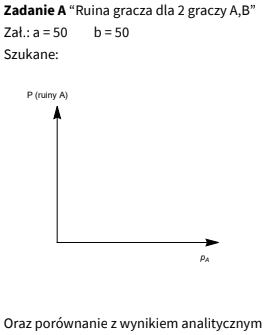


In [ ]:
import random

def player_ruin(start_money, win_probability, all_money):
  money = start_money
  while money > 0 and money< all_money:
    #print(f"money: {money}")

    if random.random()<win_probability:
      money+=1
    else:
      money-=1

    if money ==0:
      #print(f'player_ruined for probability {win_probability}')
      return 1
    elif money == all_money:
      #print(f'player won for probability {win_probability}')
      return 0





In [ ]:
player_ruin(10,0.2,30)

1

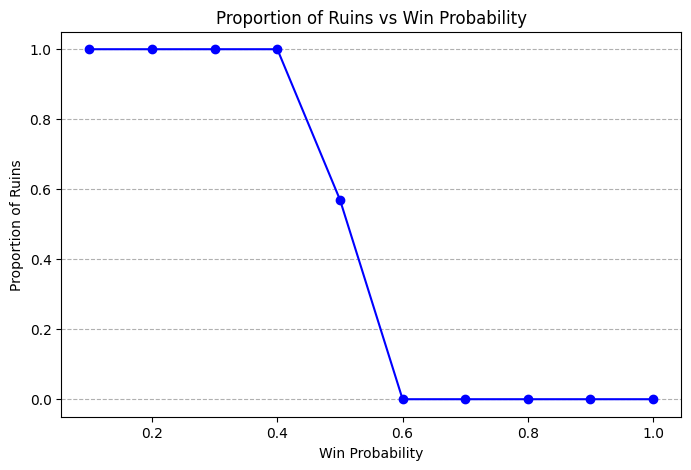

In [ ]:
import matplotlib.pyplot as plt

wins = 0
loses =0
map ={}
for i in range(10):
  x = (i+1)/10
  map[x] = 0
  for l in range(100):
    if player_ruin(50,x,100) == 1:
      wins +=1
      map[x] +=(1/100)
    else:
      loses +=1

#print(f'wins: {wins} and loses: {loses}')
#print(map)


plt.figure(figsize=(8, 5))
plt.plot(map.keys(), map.values(), marker='o', color='blue')
plt.title('Proportion of Ruins vs Win Probability')
plt.xlabel('Win Probability')
plt.ylabel('Proportion of Ruins')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

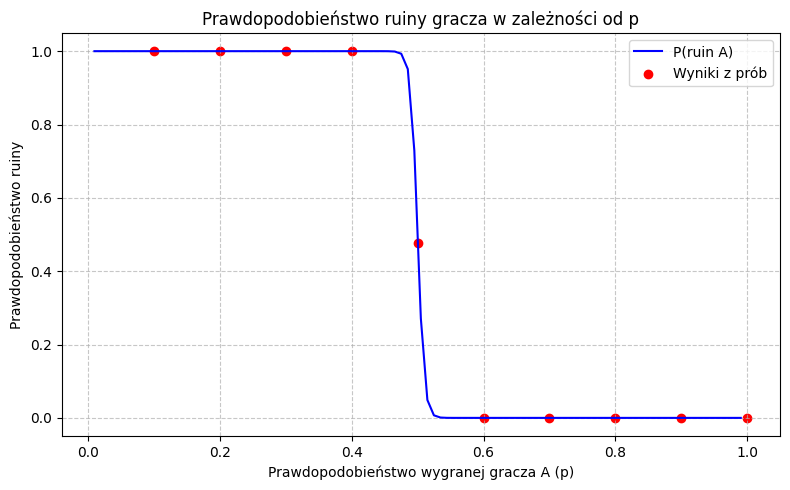

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


wins = 0
loses =0
map ={}
for i in range(10):
  x = (i+1)/10
  map[x] = 0
  for l in range(1000):
    if player_ruin(50,x,100) == 1:
      wins +=1
      map[x] +=(1/1000)
    else:
      loses +=1



# Parametry gry
M_a = 50  # Pieniądze gracza A
M_b = 50  # Pieniądze gracza B

# Prawdopodobieństwa wygranej gracza A (p) w przedziale od 0.1 do 0.9
p_values = np.linspace(0.01, 0.99, 100)
q_values = 1 - p_values  # Prawdopodobieństwo wygranej gracza B

# Obliczanie prawdopodobieństw ruiny gracza A dla różnych wartości p
#ruin_prob_a = (1 - (q_values / p_values) ** M_a) / (1 - (q_values / p_values) ** (M_a + M_b))
ruin_prob_a = ((q_values/p_values)** M_a - (q_values/p_values)**(M_a+M_b))/(1- (q_values/p_values)**(M_a + M_b))

# Ustawienie granicy dla przypadku symetrycznego (p = q = 0.5)
ruin_prob_a[p_values == 0.5] = M_b / (M_a + M_b)  # Wartość dla symetrii

# Wykres
plt.figure(figsize=(8, 5))
plt.plot(p_values, ruin_prob_a, label='P(ruin A)', color='blue')
plt.scatter(map.keys(), map.values(), color='red', zorder=1, label='Wyniki z prób')
plt.title('Prawdopodobieństwo ruiny gracza w zależności od p')
plt.xlabel('Prawdopodobieństwo wygranej gracza A (p)')
plt.ylabel('Prawdopodobieństwo ruiny')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Zadanie B

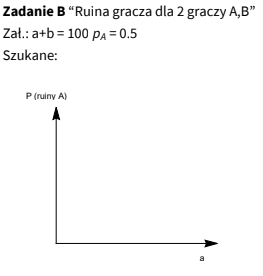

<ipython-input-82-c0ddee9a892b>:33: RuntimeWarning: invalid value encountered in divide
  ruin_prob_a = ((q_values/p_values)** M_a - (q_values/p_values)**(M_a+M_b))/(1- (q_values/p_values)**(M_a + M_b))


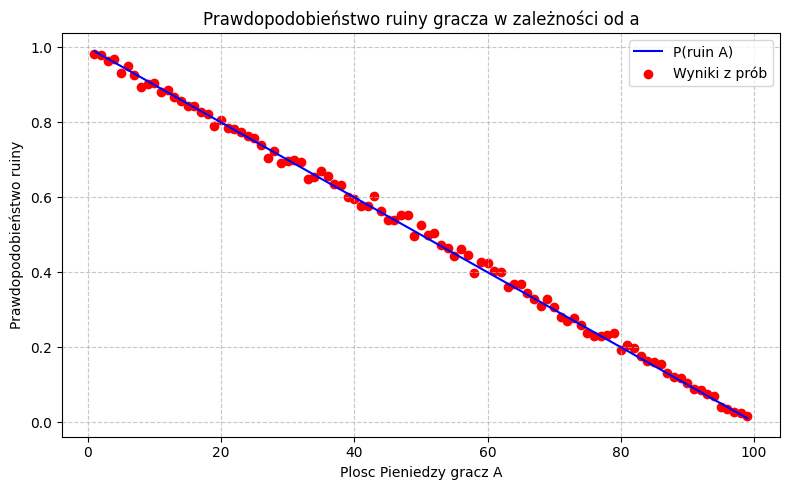

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ilosc_prob = 1000

wins = 0
loses =0
map ={}
for i in range(99):
  money = i+1
  map[money] = 0
  #print(f'money: {money}')
  for l in range(ilosc_prob):
    if player_ruin(money,0.5,100) == 1:
      wins +=1
      map[money] +=(1/ilosc_prob)
    else:
      loses +=1



# Parametry gry

M_a = np.linspace(1, 99, 100)
M_b = 100 - M_a

# Prawdopodobieństwa wygranej gracza A (p) w przedziale od 0.1 do 0.9
p_values = 0.5
q_values = 1 - p_values  # Prawdopodobieństwo wygranej gracza B

# Obliczanie prawdopodobieństw ruiny gracza A dla różnych wartości p
#ruin_prob_a = (1 - (q_values / p_values) ** M_a) / (1 - (q_values / p_values) ** (M_a + M_b))
ruin_prob_a = ((q_values/p_values)** M_a - (q_values/p_values)**(M_a+M_b))/(1- (q_values/p_values)**(M_a + M_b))

# Ustawienie granicy dla przypadku symetrycznego (p = q = 0.5)
ruin_prob_a[p_values == 0.5] = M_b / (M_a + M_b)  # Wartość dla symetrii

# Wykres
plt.figure(figsize=(8, 5))
plt.plot(M_a, ruin_prob_a, label='P(ruin A)', color='blue')
plt.scatter(map.keys(), map.values(), color='red', zorder=1, label='Wyniki z prób')
plt.title('Prawdopodobieństwo ruiny gracza w zależności od a')
plt.xlabel('Plosc Pieniedzy gracz A')
plt.ylabel('Prawdopodobieństwo ruiny')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Zadanie C

#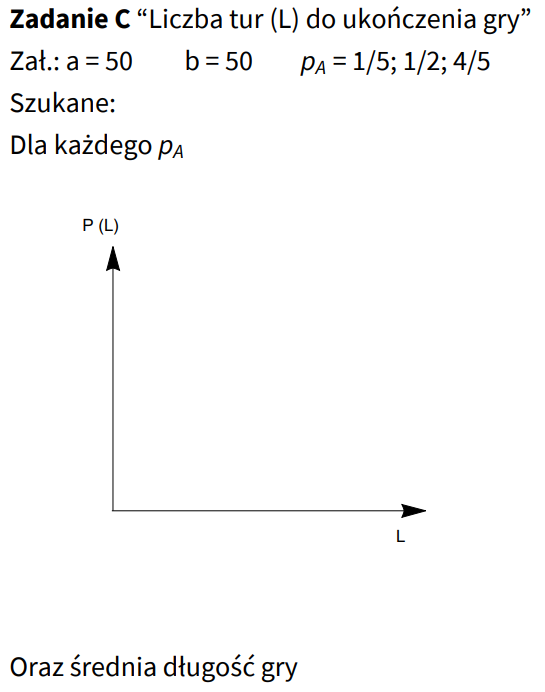


In [2]:
import random

def player_ruin2(start_money, win_probability, all_money):
  money = start_money
  turn_count = 0
  while money > 0 and money< all_money:
    #print(f"money: {money}")
    turn_count +=1

    if random.random()<win_probability:
      money+=1
    else:
      money-=1

  return turn_count


Średnia liczba tur dla prawdopodbieństwa 0.2 wynosi 83.548


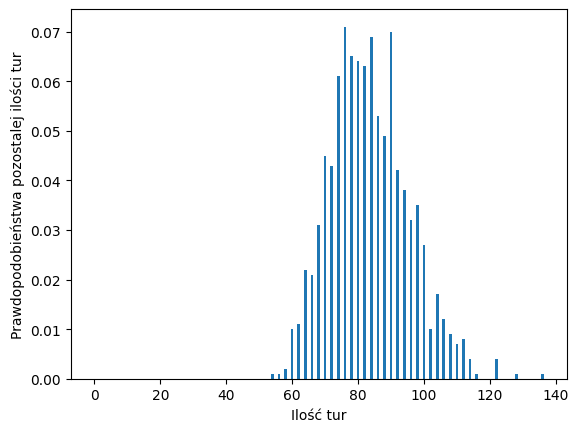

----------------------------------------------
Średnia liczba tur dla prawdopodbieństwa 0.5 wynosi 2468.556


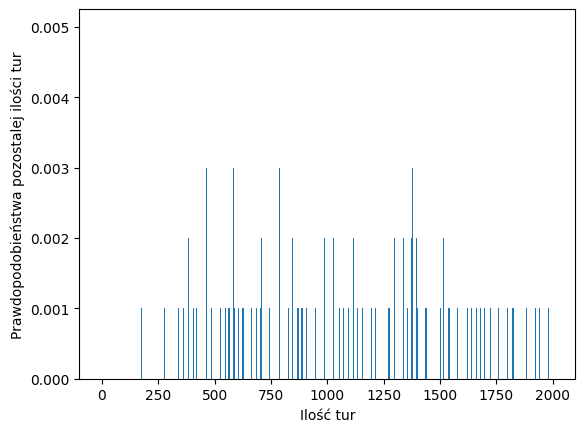

----------------------------------------------
Średnia liczba tur dla prawdopodbieństwa 0.8 wynosi 83.266


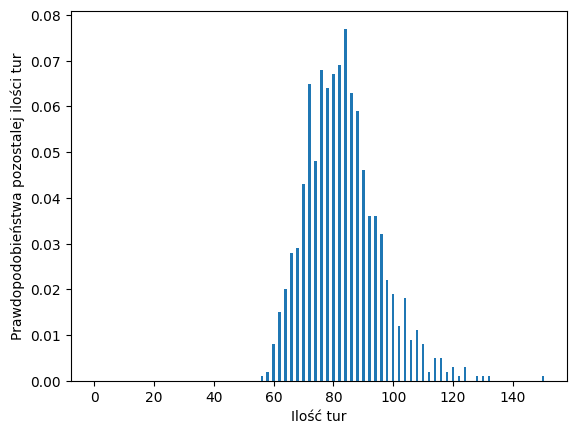

----------------------------------------------


In [24]:
import matplotlib.pyplot as plt
import numpy as np

simulations = 1000

start_money = 50
all_money = 100
win_probabilities = [0.2,0.5,0.8]
avg_turn_counts = []


for win_prob in win_probabilities:
  turn_counts = [player_ruin2(start_money, win_prob, all_money) for _ in range(simulations)]
  avg_turn_counts = np.mean(turn_counts)  # Obliczanie średniej liczby tur

  max_turns = max(turn_counts)
  if max_turns > 2000:
    max_turns = 2000
  Lvalues= np.arange(0,max_turns+1)

  P_L=[0] * (max_turns+1)
  for turn in turn_counts:
    if turn <= max_turns:
      P_L[turn] += 1/simulations

  print(f'Średnia liczba tur dla prawdopodbieństwa {win_prob} wynosi {avg_turn_counts}')
  # Wykres typu bar
  plt.bar(Lvalues, P_L)
  plt.title("")
  plt.xlabel("Ilość tur")
  plt.ylabel("Prawdopodobieństwa pozostalej ilości tur")
  plt.show()
  print("----------------------------------------------")






# Zadanie D

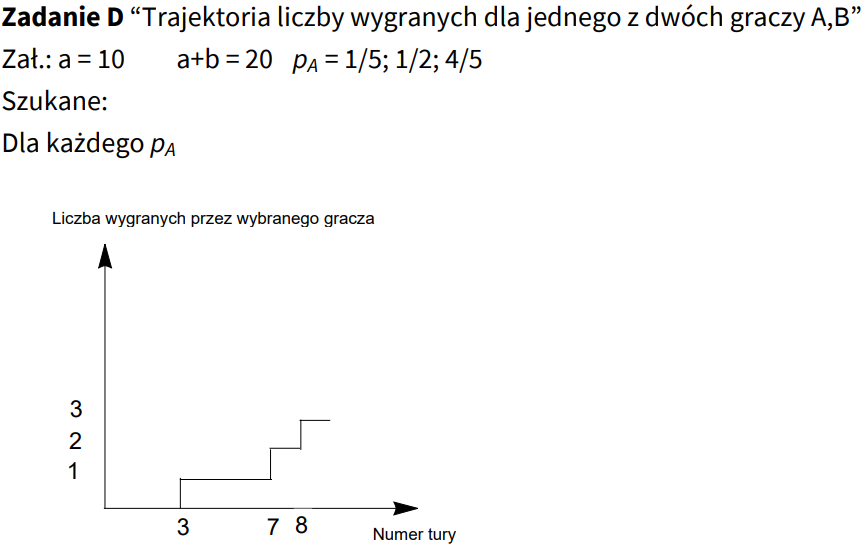

In [ ]:
import random

def player_ruin3(start_money, win_probability, all_money):
  money = start_money
  iloścTur = 0
  map = {0:0}
  while money > 0 and money< all_money:
    #print(f"money: {money}")
    iloścTur +=1

    if random.random()<win_probability:
      money+=1
      map[iloścTur] = map[iloścTur-1] +1
    else:
      money-=1
      map[iloścTur] = map[iloścTur-1]

  return map


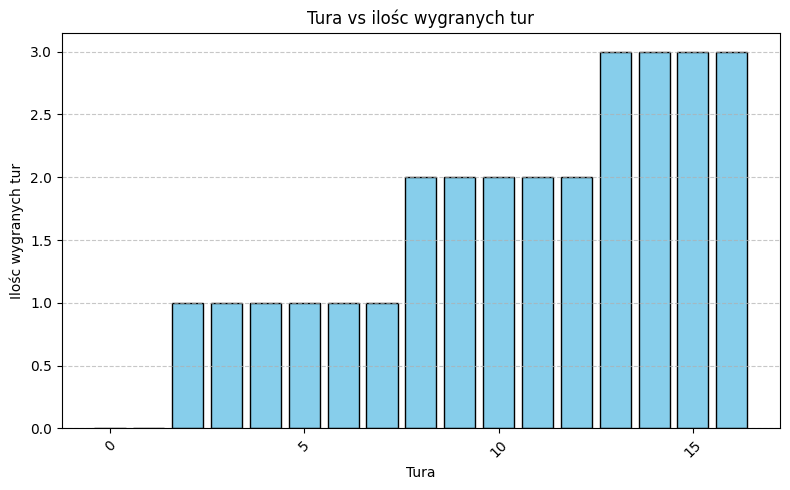

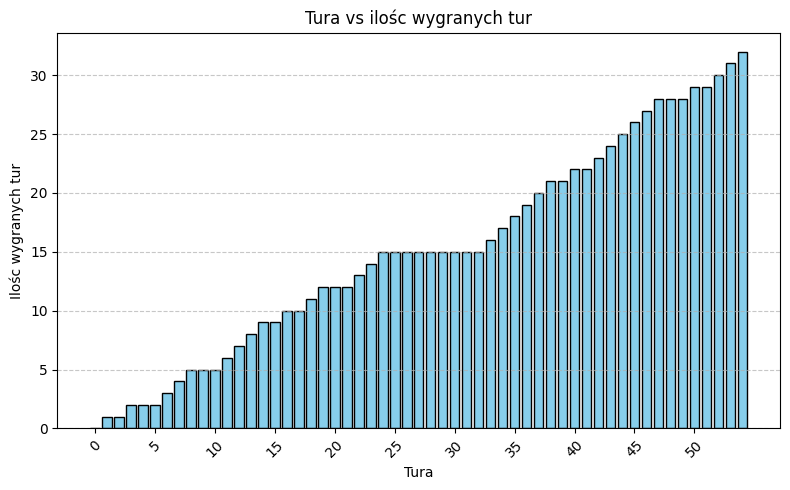

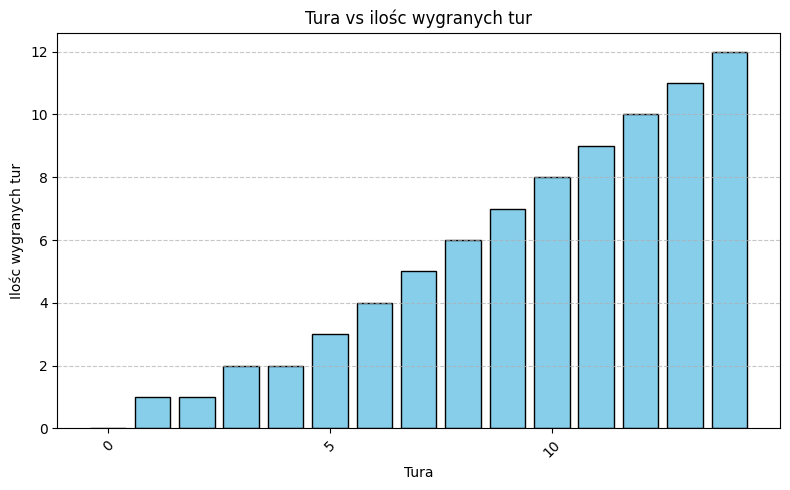

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

ilosc_prob = 1

wins = 0
loses =0

for i in [0.2,0.5,0.8]:
  map ={}
  avg = 0
  sum=0

  #print(f'money: {money}')
  for l in range(ilosc_prob):
    map = player_ruin3(10,i,20)


  #print(map)


  plt.figure(figsize=(8, 5))
  plt.bar(map.keys(), map.values(), color='skyblue', edgecolor='black')
  plt.title('Tura vs ilośc wygranych tur')
  plt.xlabel('Tura')
  plt.ylabel('Ilośc wygranych tur')
  plt.xticks(list(map.keys())[::5], rotation=45)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()




